In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Replace with your actual API key
API_KEY = "734fd00c4242e4ee162e4aa7911be027"  
BASE_URL = "https://api.openweathermap.org/data/2.5/weather"

In [3]:
 def get_weather(city):
##Fetching weather data for city.
    params = {
        "q": city,
        "appid": API_KEY,
        "units": "metric"
    }
    
    response = requests.get(BASE_URL, params=params)
    
    if response.status_code == 200:
        data = response.json()
        return {
            "City": city,
            "Temperature": data["main"]["temp"],
            "Weather": data["weather"][0]["description"],
            "Humidity": data["main"]["humidity"]
        }
    else:
        print(f"Error fetching data for {city}: {response.status_code}")
        return None

In [4]:
# List of cities
cities = ["New York", "London", "Tokyo", "Chicago", "Paris"]

In [5]:
# Fetch weather data
weather_data = [get_weather(city) for city in cities if get_weather(city)]

In [6]:
# Create DataFrame
df = pd.DataFrame(weather_data)
df

,City,Temperature,Weather,Humidity
0,New York,-1.69,scattered clouds,49
1,London,12.55,overcast clouds,90
2,Tokyo,1.96,clear sky,37
3,Chicago,-4.93,overcast clouds,59
4,Paris,12.49,clear sky,93


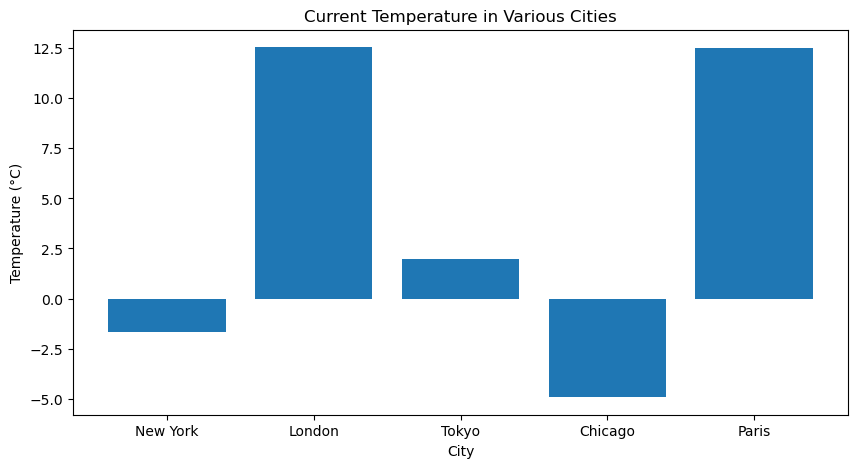

In [7]:
# Create bar chart for temperatures
plt.figure(figsize=(10, 5))
plt.bar(df["City"], df["Temperature"])
plt.xlabel("City")
plt.ylabel("Temperature (°C)")
plt.title("Current Temperature in Various Cities")
plt.show()

In [8]:
##Find the Highest City
highest_city = df.loc[df["Temperature"].idxmax()]

print(f"Highest City: {highest_city['City']} ({highest_city['Temperature']}°C)")

Highest City: London (12.55°C)


In [9]:
##Find the Lowest City
lowest_city = df.loc[df["Temperature"].idxmin()]

print(f"Lowest City: {lowest_city['City']} ({lowest_city['Temperature']}°C)")

Lowest City: Chicago (-4.93°C)
